In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Creating the dataframe of train data by importing train_crab.csv file
Train_df=pd.read_csv('train_crab.csv',index_col='id')

In [3]:
Train_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [4]:
Train_df.isin({0}).sum()

Sex                0
Length             0
Diameter           0
Height            24
Weight             0
Shucked Weight     0
Viscera Weight     0
Shell Weight       0
Age                0
dtype: int64

In [5]:
Train_df=Train_df[Train_df['Height']!=0]

In [6]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74027 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74027 non-null  object 
 1   Length          74027 non-null  float64
 2   Diameter        74027 non-null  float64
 3   Height          74027 non-null  float64
 4   Weight          74027 non-null  float64
 5   Shucked Weight  74027 non-null  float64
 6   Viscera Weight  74027 non-null  float64
 7   Shell Weight    74027 non-null  float64
 8   Age             74027 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [7]:
Train_df.isin({0}).sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [8]:
Train_df['Sex'].value_counts()

M    27084
I    23933
F    23010
Name: Sex, dtype: int64

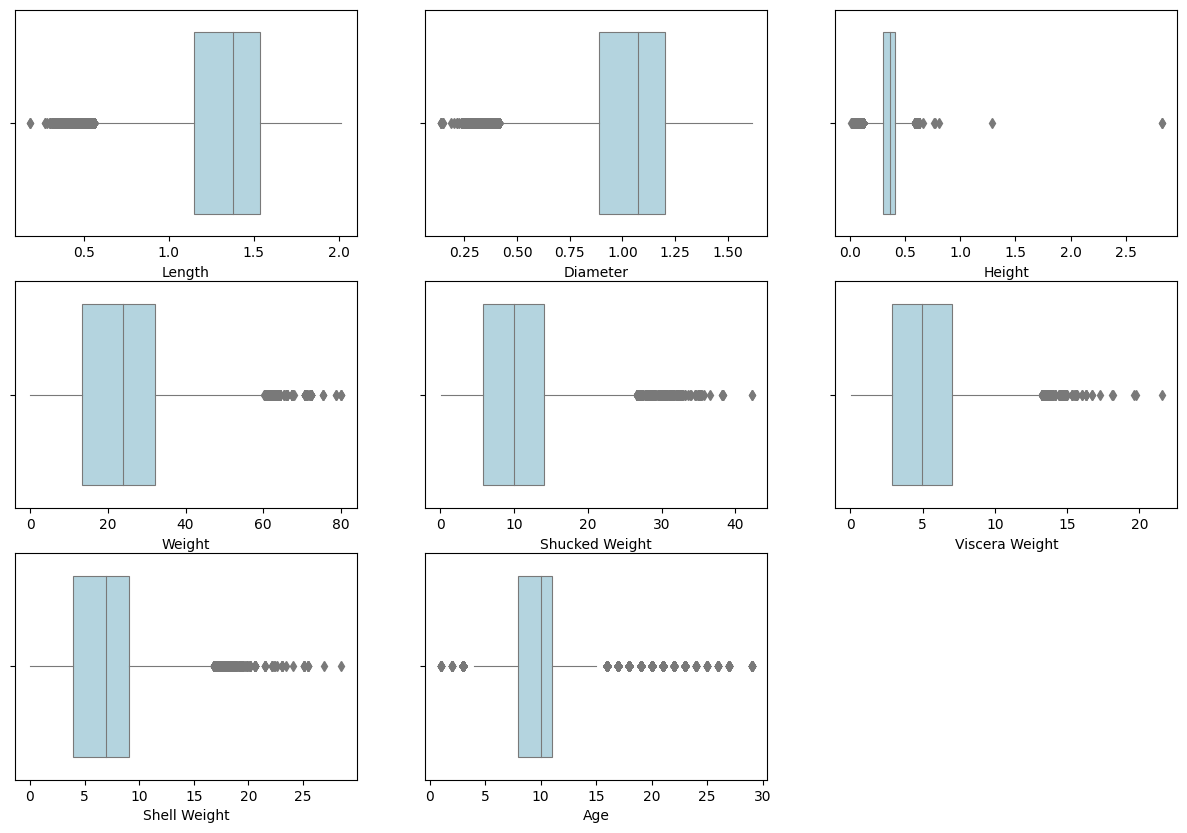

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(15,10))
cntus_df=Train_df.iloc[:,1:]
# Flatten the axes array for easy iteration
axes = axes.flatten()
# Iterate over columns and create boxenplot for each
for i, column in enumerate(cntus_df.columns):
    ax = axes[i]
    sns.boxplot(x=cntus_df[column],showcaps=False,ax=ax,linewidth=0.8,color='lightblue')
# Hide empty subplots if the number of columns is less than 9
if len(Train_df.iloc[:,1:].columns) < 3*3:
    for j in range(len(Train_df.iloc[:,1:].columns),3*3):
        fig.delaxes(axes[j])

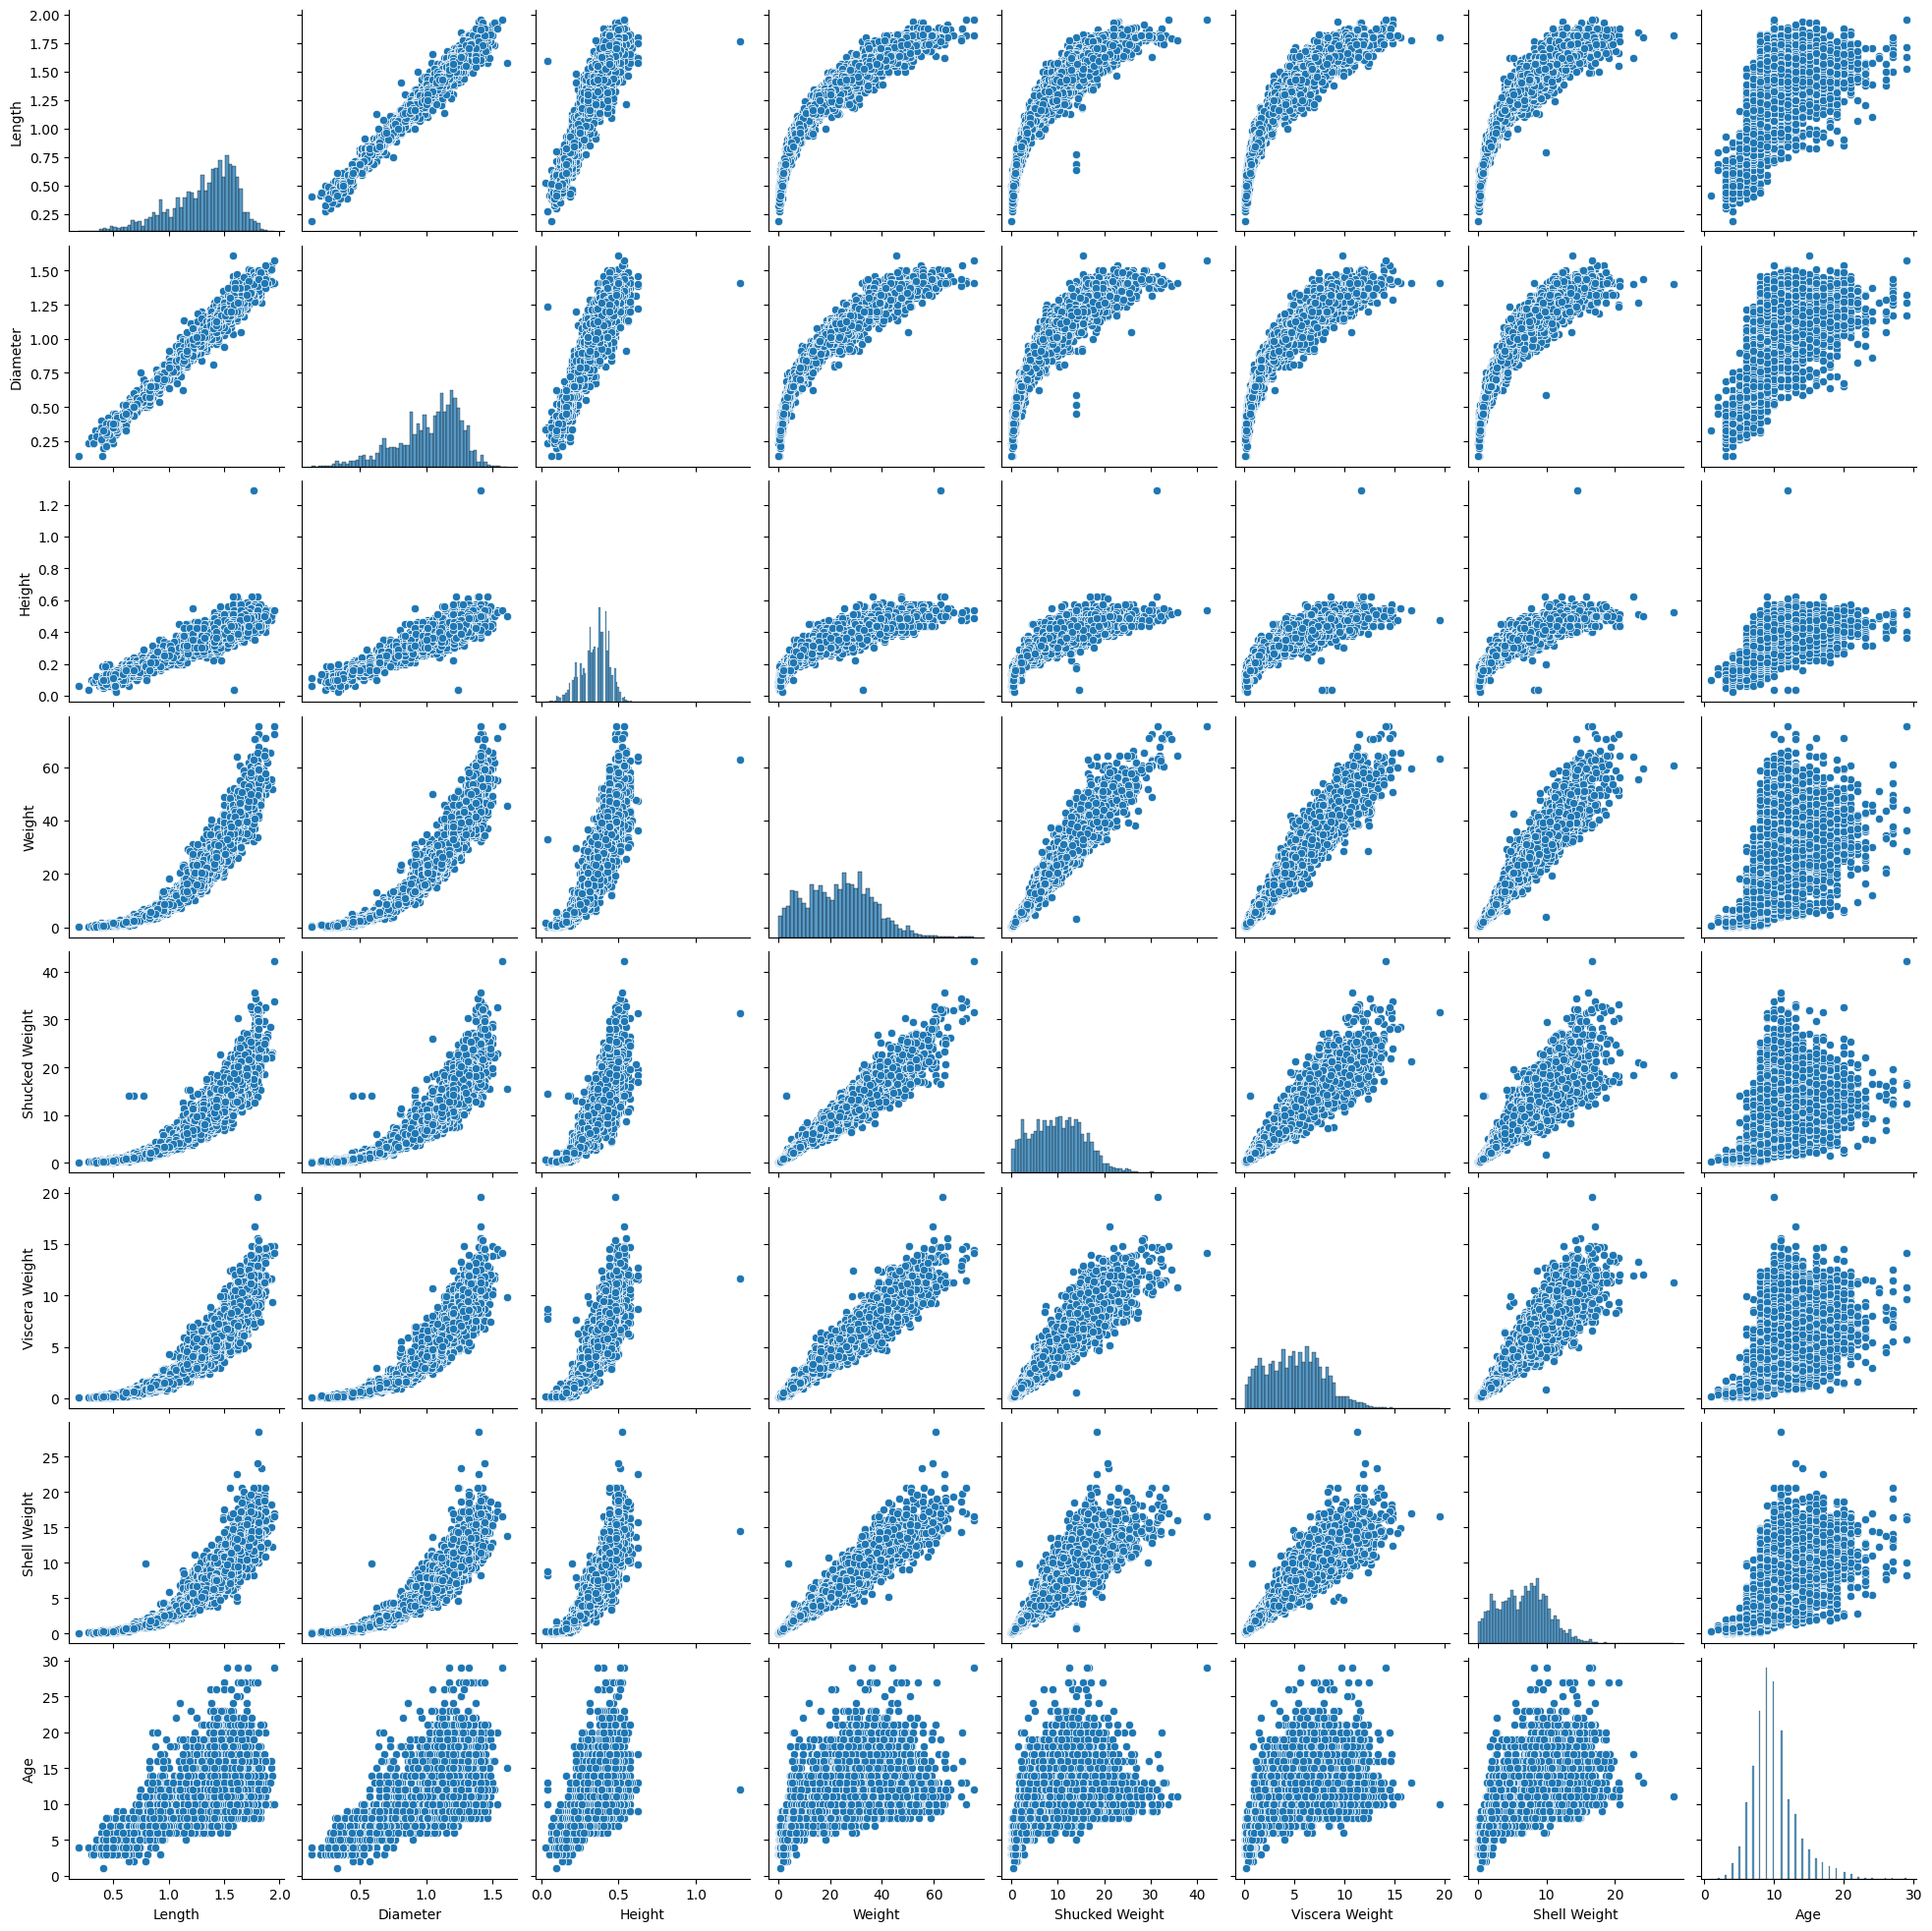

In [10]:
sns.pairplot(Train_df.iloc[200:15000,:])

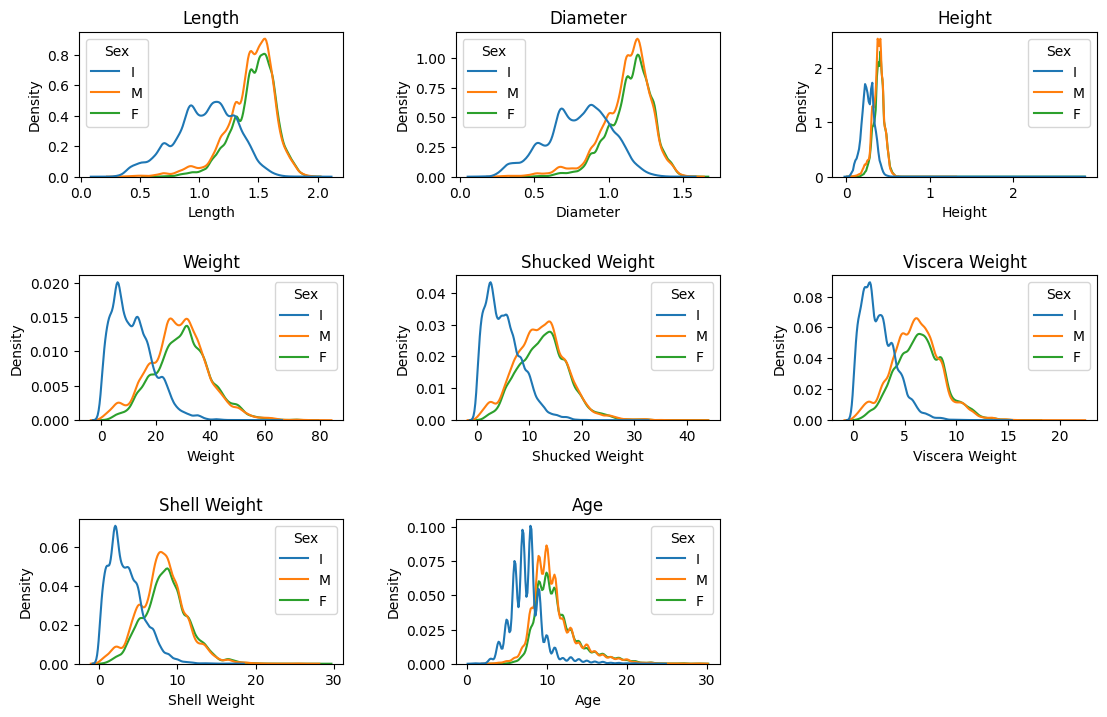

In [11]:
fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(12, 8))
fig.tight_layout(pad=5)  # Adjust padding between subplots

# Flatten the axes array
axes = axes.flatten()

# Iterate over the columns and create subplots
for i, col in enumerate(Train_df.iloc[:,1:].columns):
    sns.kdeplot(data=Train_df,x=col,hue='Sex',ax=axes[i])
    axes[i].set_title(col)

# Hide empty subplots if the number of columns is less than 9
if len(Train_df.iloc[:,1:].columns) < 3*3:
    for j in range(len(Train_df.iloc[:,1:].columns),3*3):
        fig.delaxes(axes[j])

plt.show()

In [12]:
Train_df.sample(5)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
1922,F,1.4250,1.0750,0.3875,24.777463,12.686401,5.854172,6.945627,10
46516,I,0.4375,0.3000,0.1250,0.893009,0.354369,0.085048,0.297670,3
71764,F,1.6250,1.2625,0.4125,34.614739,14.188925,8.334753,9.922325,9
37844,M,1.4250,1.1250,0.3750,26.322511,10.460966,5.528153,7.796112,12
33553,F,1.6875,1.3125,0.4125,44.990657,19.660378,9.525432,12.119411,10


In [14]:
original_df=pd.read_csv('CrabAgePrediction.csv')
original_df.sample(3)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
1184,F,1.0625,0.8125,0.3375,10.829509,4.153202,2.239610,3.968930,12
120,I,1.2125,1.0375,0.3500,16.173390,7.087375,3.798833,5.244657,8
1886,M,1.3000,1.1625,0.3750,26.946200,12.927372,5.641551,7.229122,8


In [15]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [16]:
for x in original_df.iloc[:,1:].columns:
    original_df=original_df[original_df[x] != 0]

In [17]:
original_df.shape

(3891, 9)

In [18]:
# Creating the dataframe of test data by importing test_crab.csv file
valid_df=pd.read_csv('test_crab.csv',index_col='id')
valid_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,,,
74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [19]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49368 entries, 74051 to 123418
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             49368 non-null  object 
 1   Length          49368 non-null  float64
 2   Diameter        49368 non-null  float64
 3   Height          49368 non-null  float64
 4   Weight          49368 non-null  float64
 5   Shucked Weight  49368 non-null  float64
 6   Viscera Weight  49368 non-null  float64
 7   Shell Weight    49368 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.4+ MB


In [20]:
Total_df=pd.concat([Train_df,valid_df,original_df])

In [21]:
Total_df['Remianing_weight']=Total_df['Weight']-(Total_df['Shucked Weight']+Total_df['Viscera Weight']+Total_df['Shell Weight'])

In [22]:
len(Total_df[Total_df['Remianing_weight']<0])

15001

In [23]:
Total_df.loc[Total_df['Remianing_weight']<0,'Remianing_weight']=0

In [24]:
len(Total_df[Total_df['Remianing_weight']<0])

0

<AxesSubplot: xlabel='Length', ylabel='Age'>

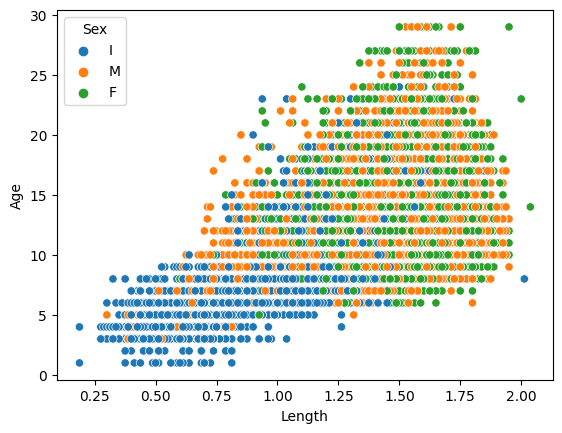

In [25]:
sns.scatterplot(Total_df,x='Length',y='Age',hue='Sex')

In [26]:
Total_df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Remianing_weight
count,127286.000000,127286.000000,127286.000000,127286.000000,127286.000000,127286.000000,127286.000000,77918.000000,127286.000000
mean,1.318317,1.025222,0.348434,23.425810,10.119323,5.067211,6.735749,9.968929,1.572405
std,0.287696,0.237308,0.092419,12.683243,5.635916,2.801868,3.591886,3.176353,1.622133
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000,0.000000
25%,1.150000,0.887500,0.300000,13.480187,5.712424,2.863300,3.968930,8.000000,0.382718
50%,1.375000,1.075000,0.362500,23.799405,9.908150,4.975337,6.931453,10.000000,1.148155
75%,1.537500,1.200000,0.412500,32.205032,14.047177,7.002326,9.114364,11.000000,2.267960
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000,25.500375


In [27]:
Total_df.corr()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Remianing_weight
Length,1.000000,0.989367,0.913306,0.935857,0.914655,0.917129,0.916357,0.609315,0.523882
Diameter,0.989367,1.000000,0.916319,0.937686,0.913135,0.917603,0.922165,0.618289,0.529630
Height,0.913306,0.916319,1.000000,0.896431,0.858495,0.878014,0.898018,0.632611,0.520023
Weight,0.935857,0.937686,0.896431,1.000000,0.971113,0.970632,0.964858,0.597289,0.626251
Shucked Weight,0.914655,0.913135,0.858495,0.971113,1.000000,0.942250,0.909139,0.498000,0.488329
Viscera Weight,0.917129,0.917603,0.878014,0.970632,0.942250,1.000000,0.932601,0.572075,0.526611
Shell Weight,0.916357,0.922165,0.898018,0.964858,0.909139,0.932601,1.000000,0.660965,0.564139
Age,0.609315,0.618289,0.632611,0.597289,0.498000,0.572075,0.660965,1.000000,0.482571
Remianing_weight,0.523882,0.529630,0.520023,0.626251,0.488329,0.526611,0.564139,0.482571,1.000000


In [28]:
# Calculate the volume
import math
Total_df["Volume"] = math.pi * (Total_df["Diameter"] / 2) ** 2 * Total_df["Height"]

In [29]:
Total_df['LW']=Total_df['Length']*Total_df['Weight']

In [30]:
Total_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Remianing_weight,Volume,LW
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9.0,1.247378,0.406628,44.184113
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8.0,0.170097,0.147004,11.460285
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9.0,1.219029,0.364520,34.378730
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11.0,4.316891,0.783496,86.122946
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8.0,0.850485,0.271740,29.111393


In [31]:
Total_df=Total_df[Total_df['Height']!=0]

In [32]:
Total_df.shape

(127272, 12)

In [33]:
Total_df.corr()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Remianing_weight,Volume,LW
Length,1.000000,0.989362,0.913392,0.935862,0.914656,0.917128,0.916385,0.609315,0.523853,0.927605,0.910939
Diameter,0.989362,1.000000,0.916422,0.937690,0.913133,0.917600,0.922193,0.618289,0.529602,0.939865,0.909641
Height,0.913392,0.916422,1.000000,0.896619,0.858655,0.878193,0.898274,0.632611,0.520123,0.939337,0.869427
Weight,0.935862,0.937690,0.896619,1.000000,0.971105,0.970625,0.964872,0.597289,0.626221,0.970560,0.993573
Shucked Weight,0.914656,0.913133,0.858655,0.971105,1.000000,0.942236,0.909139,0.498000,0.488276,0.937851,0.966826
Viscera Weight,0.917128,0.917600,0.878193,0.970625,0.942236,1.000000,0.932607,0.572075,0.526565,0.948744,0.965100
Shell Weight,0.916385,0.922193,0.898274,0.964872,0.909139,0.932607,1.000000,0.660965,0.564114,0.956605,0.955979
Age,0.609315,0.618289,0.632611,0.597289,0.498000,0.572075,0.660965,1.000000,0.482571,0.604141,0.569632
Remianing_weight,0.523853,0.529602,0.520123,0.626221,0.488276,0.526565,0.564114,0.482571,1.000000,0.572637,0.621672
Volume,0.927605,0.939865,0.939337,0.970560,0.937851,0.948744,0.956605,0.604141,0.572637,1.000000,0.968388


In [34]:
Total_df.isin({0}).sum()

Sex                     0
Length                  0
Diameter                0
Height                  0
Weight                  0
Shucked Weight          0
Viscera Weight          0
Shell Weight            0
Age                     0
Remianing_weight    15349
Volume                  0
LW                      0
dtype: int64

In [35]:
Total_df.isna().sum()

Sex                     0
Length                  0
Diameter                0
Height                  0
Weight                  0
Shucked Weight          0
Viscera Weight          0
Shell Weight            0
Age                 49354
Remianing_weight        0
Volume                  0
LW                      0
dtype: int64

sns.pairplot(Train_df,hue='Sex')

In [36]:
Total_df.head() # To view the Train_df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Remianing_weight,Volume,LW
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9.0,1.247378,0.406628,44.184113
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8.0,0.170097,0.147004,11.460285
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9.0,1.219029,0.364520,34.378730
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11.0,4.316891,0.783496,86.122946
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8.0,0.850485,0.271740,29.111393


In [37]:
# Weight ratios
Total_df["Shucked_to_Weight"] = Total_df["Shucked Weight"] / Total_df["Weight"]
Total_df["Viscera_to_Weight"] = Total_df["Viscera Weight"] / Total_df["Weight"]
Total_df['Shell_to_Weight'] = Total_df['Shell Weight'] / Total_df['Weight']

In [38]:
Total_df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Remianing_weight', 'Volume',
       'LW', 'Shucked_to_Weight', 'Viscera_to_Weight', 'Shell_to_Weight'],
      dtype='object')

In [39]:
#Changing the order of columns in the train_df
re_ordered=['Sex','Length','Diameter','Height','Weight','Shucked Weight',
       'Viscera Weight','Shell Weight','Remianing_weight','Volume',
       'LW','Shucked_to_Weight','Viscera_to_Weight','Shell_to_Weight','Age']
Total_df=Total_df.reindex(columns=re_ordered)

In [40]:
Total_df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Remianing_weight,Volume,LW,Shucked_to_Weight,Viscera_to_Weight,Shell_to_Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1.247378,0.406628,44.184113,0.439335,0.229452,0.288160,9.0
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,0.170097,0.147004,11.460285,0.434014,0.223129,0.326531,8.0
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1.219029,0.364520,34.378730,0.457666,0.224256,0.268879,9.0
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,4.316891,0.783496,86.122946,0.401791,0.216970,0.296027,11.0
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,0.850485,0.271740,29.111393,0.514303,0.193548,0.255630,8.0


In [41]:
Total_df.drop(['Shucked Weight','Viscera Weight','Shell Weight'],axis=1,inplace=True)

In [42]:
Total_df.head()

,Sex,Length,Diameter,Height,Weight,Remianing_weight,Volume,LW,Shucked_to_Weight,Viscera_to_Weight,Shell_to_Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,1.247378,0.406628,44.184113,0.439335,0.229452,0.288160,9.0
1,I,1.1000,0.8250,0.2750,10.418441,0.170097,0.147004,11.460285,0.434014,0.223129,0.326531,8.0
2,M,1.3875,1.1125,0.3750,24.777463,1.219029,0.364520,34.378730,0.457666,0.224256,0.268879,9.0
3,F,1.7000,1.4125,0.5000,50.660556,4.316891,0.783496,86.122946,0.401791,0.216970,0.296027,11.0
4,I,1.2500,1.0125,0.3375,23.289114,0.850485,0.271740,29.111393,0.514303,0.193548,0.255630,8.0


In [43]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
dummy_df=pd.get_dummies(Total_df['Sex'])
dummy_df.head(3)

,F,I,M
0,0,1,0
1,0,1,0
2,0,0,1


In [44]:
Total_df.drop('Sex',inplace=True,axis=1)
Total_df=pd.concat([dummy_df,Total_df],axis=1)

In [45]:
X_valid=Total_df[Total_df['Age'].isnull()==True]

In [46]:
T_df=Total_df[Total_df['Age'].isnull()==False]

In [47]:
T_df.shape

(77918, 14)

In [48]:
X_valid.shape

(49354, 14)

In [49]:
T_df.isna().sum()

F                    0
I                    0
M                    0
Length               0
Diameter             0
Height               0
Weight               0
Remianing_weight     0
Volume               0
LW                   0
Shucked_to_Weight    0
Viscera_to_Weight    0
Shell_to_Weight      0
Age                  0
dtype: int64

In [50]:
X=T_df.drop('Age',axis=1)
Y=T_df['Age']

# ML 

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.decomposition import PCA
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [53]:
print(Y_train.shape)

(62334,)


In [ ]:
# Create an instance of the LightGBM Regression model
lgb_model = LGBMRegressor()
fit_params = {'categorical_feature': [0], 'early_stopping_rounds': 5,'eval_set':[(X, Y)],'eval_metric': ['mae','rmse','r2_score']}
mae_scores=cross_val_score(lgb_model,X,Y,cv=5,fit_params=fit_params,scoring='neg_mean_absolute_error')
rmse_scores=cross_val_score(lgb_model,X,Y,cv=5,fit_params=fit_params,scoring='neg_root_mean_squared_error')
mae_scores = -mae_scores
rmse_scores=-rmse_scores
mean_mae = np.mean(mae_scores)
rmse_score=np.mean(rmse_scores)
# Print the mean MAE
print("Mean Absolute Error:", mean_mae)
print('RMSE:',rmse_score)

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = param_grid = {
    'learning_rate': [0.5, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5],
    'min_child_samples': [10, 20, 30]
}
# Create the XGBoost regressor estimate
lgbm_reg=LGBMRegressor()

# Performing grid search
grid_search = GridSearchCV(lgbm_reg,param_grid=param_grid,scoring='neg_mean_absolute_error',cv=5,n_jobs=-1)
grid_search.fit(X_train,Y_train)

# Getting the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluation of the built best model
mae = mean_absolute_error(Y_test,best_model.predict(X_test))
mse = mean_squared_error(Y_test,best_model.predict(X_test))
r2 = r2_score(Y_test,best_model.predict(X_test))

print("Best Parameters:", best_params)
print("Mean Absolute Error:", mae)
print('RMSE:',np.sqrt(mse))
print("R2 Score:", r2)

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv',index_col='id')
sample_submission

In [ ]:
sample_submission['Age']=y_predict

In [ ]:
sample_submission.to_csv('submission(3).csv')